<a href="https://colab.research.google.com/github/theysee/sberbank_reboot/blob/master/%D0%A8%D0%BA%D0%BE%D0%BB%D0%B0_DA_%D0%9F%D0%BE%D1%82%D0%BE%D0%BA_3_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6_%D0%BA%D1%80%D1%83%D0%BF%D0%BD%D0%BE%D0%B9_%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%D0%90%D1%80%D1%82%D0%B5%D0%B5%D0%B2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Суть Проекта в том, чтобы проанализировать продажи в крупной строительной компании.
Входные данные поступают в формах Excel. Формируются программой автоматически, а значит всегда постоянны. Некоторые столбцы для анализа продаж не нужны, поэтому я буду их удалять, чтобы не мешались.

In [0]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib inline

In [2]:
# Если не сработает загрузка файлов, дальше есть загрузка в SQL.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Прочитал, что список файлов в Colab не получить, поэтому делаю руками.
!ls "/content/drive/My Drive/Эскроу"

Застройщик_110.xls  Застройщик_140.xls	Застройщик_146.xls  Застройщик_176.xls
Застройщик_120.xls  Застройщик_141.xls	Застройщик_170.xls  Застройщик_28.xls


In [0]:
# Функция для наведения красоты.
# Удаляем лишние данные, обрезаем сверху тех ячейки в Excel.
def pars(data_read):
  contract = data_read.iloc[5,6]
  contract = contract.split(' ')
  contract = contract[-3:-2]
  contract = int(contract[0])
  data_read.drop(data_read.columns[[0, 4, 5, 6, 7, 8, 9, 10, 11]], axis='columns', inplace=True)
  data_read.drop([0,1,2,3,4,5,6,7], inplace=True)
  data_read.columns = ['Date_open_escrow', 'Depo_summ', 'Date_pay']
  data_read['Date_open_escrow'] =  pd.to_datetime(data_read['Date_open_escrow'], format='%Y-%m-%d')
  data_read['Date_pay'] =  pd.to_datetime(data_read['Date_pay'], format='%Y-%m-%d')
  data_read['Contract'] = contract
  return data_read

In [5]:
data_read = pd.read_excel('/content/drive/My Drive/Эскроу/Застройщик_110.xls')
df = pars(data_read)
data_read = pd.read_excel('/content/drive/My Drive/Эскроу/Застройщик_140.xls')
df = df.append(pars(data_read), ignore_index = True)
data_read = pd.read_excel('/content/drive/My Drive/Эскроу/Застройщик_146.xls')
df = df.append(pars(data_read), ignore_index = True)
data_read = pd.read_excel('/content/drive/My Drive/Эскроу/Застройщик_176.xls')
df = df.append(pars(data_read), ignore_index = True)
data_read = pd.read_excel('/content/drive/My Drive/Эскроу/Застройщик_120.xls')
df = df.append(pars(data_read), ignore_index = True)
data_read = pd.read_excel('/content/drive/My Drive/Эскроу/Застройщик_141.xls')
df = df.append(pars(data_read), ignore_index = True)
data_read = pd.read_excel('/content/drive/My Drive/Эскроу/Застройщик_170.xls')
df = df.append(pars(data_read), ignore_index = True)
data_read = pd.read_excel('/content/drive/My Drive/Эскроу/Застройщик_28.xls')
df = df.append(pars(data_read), ignore_index = True)
df.dropna(inplace=True)
df['Depo_summ'] = df['Depo_summ'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1818 entries, 0 to 1845
Data columns (total 4 columns):
Date_open_escrow    1818 non-null datetime64[ns]
Depo_summ           1818 non-null int64
Date_pay            1818 non-null datetime64[ns]
Contract            1818 non-null int64
dtypes: datetime64[ns](2), int64(2)
memory usage: 71.0 KB


In [6]:
!pip install PyMySQL

In [0]:
import pymysql
DB_HOST = '89.223.95.235'
DB_USER = 'student_12'
DB_USER_PASSWORD = 'student_12'
DB_NAME = 'student_12'
conn = pymysql.connect(DB_HOST, DB_USER, DB_USER_PASSWORD, DB_NAME)

In [8]:
pd.read_sql_query("show tables", conn)

,Tables_in_student_12
0,sales


In [0]:
#query = "DROP TABLE IF EXISTS Sales"
#conn.cursor().execute(query)
#conn.commit()

In [10]:
# По идее, ключ не нужен, но как SQL без ключа.
query = """
  CREATE TABLE IF NOT EXISTS Sales (
    Sales_id INT AUTO_INCREMENT PRIMARY KEY,
    Date_open_escrow DATETIME,
    Depo_summ NUMERIC,
    Date_pay DATETIME,
    Contract INT
    )
""" 

conn.cursor().execute(query)
conn.commit()

/usr/local/lib/python3.6/dist-packages/pymysql/cursors.py:170: Warning: (1050, "Table 'sales' already exists")
  result = self._query(query)


In [0]:
queries = []

for index, row in df.iterrows():
    querie = f'''INSERT INTO Sales (Date_open_escrow, Depo_summ, Date_pay, Contract) VALUES ('{row[0]}', '{row[1]}', '{row[2]}', '{row[3]}')'''
    queries.append(querie)

#for q in queries:
  #conn.cursor().execute(q)
#conn.commit()

In [127]:
# Если строк 1818, значит всё в порядке.
df = pd.read_sql_query('''SELECT * FROM Sales''', conn)
df.head()

,Sales_id,Date_open_escrow,Depo_summ,Date_pay,Contract
0,1,2019-06-28 16:08:00,3048000.0,2019-09-30,110
1,2,2019-06-28 09:13:00,2048000.0,2019-08-31,110
2,3,2019-06-28 10:45:00,2448000.0,2019-08-31,110
3,4,2019-06-28 09:40:00,98000.0,2021-09-30,110
4,5,2019-06-28 16:47:00,3700000.0,2019-12-31,110


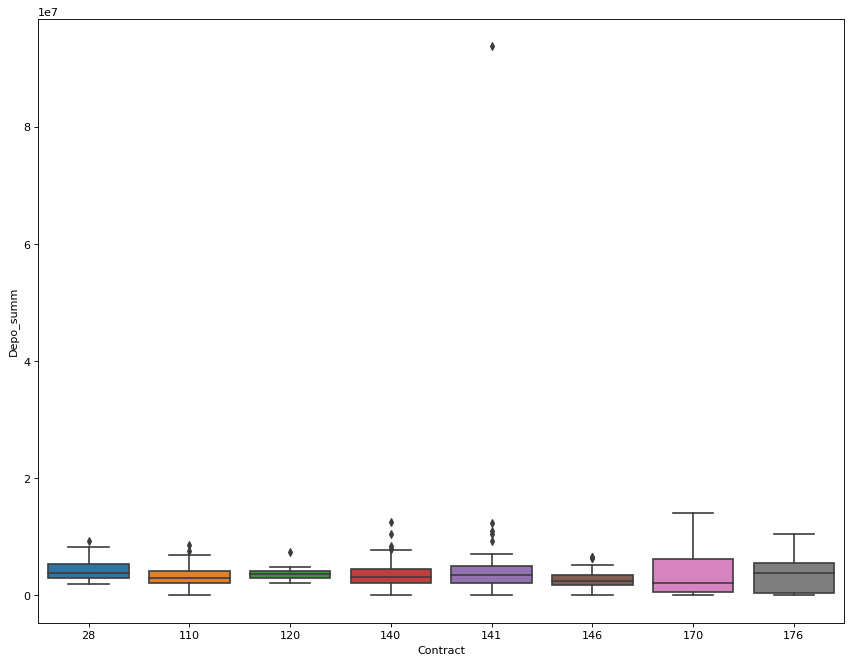

In [13]:
# Используем ящик, чтобы понять, какой вообще разброс цены.
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='Contract', y='Depo_summ', data=df, notch=False)
# Видим выброс. Это не ошибка, такая продажа действительно была.

In [14]:
# Та самая сумма.
df['Depo_summ'].max()

93782826.0

In [15]:
# Посмотрим статистику по Датафрейму
df.describe()

,Sales_id,Depo_summ,Contract
count,1818.000000,1.818000e+03,1818.000000
mean,909.500000,3.470487e+06,130.777228
std,524.955712,3.154061e+06,49.057146
min,1.000000,1.000000e+00,28.000000
25%,455.250000,1.987401e+06,110.000000
50%,909.500000,3.400000e+06,141.000000
75%,1363.750000,4.950000e+06,170.000000
max,1818.000000,9.378283e+07,176.000000


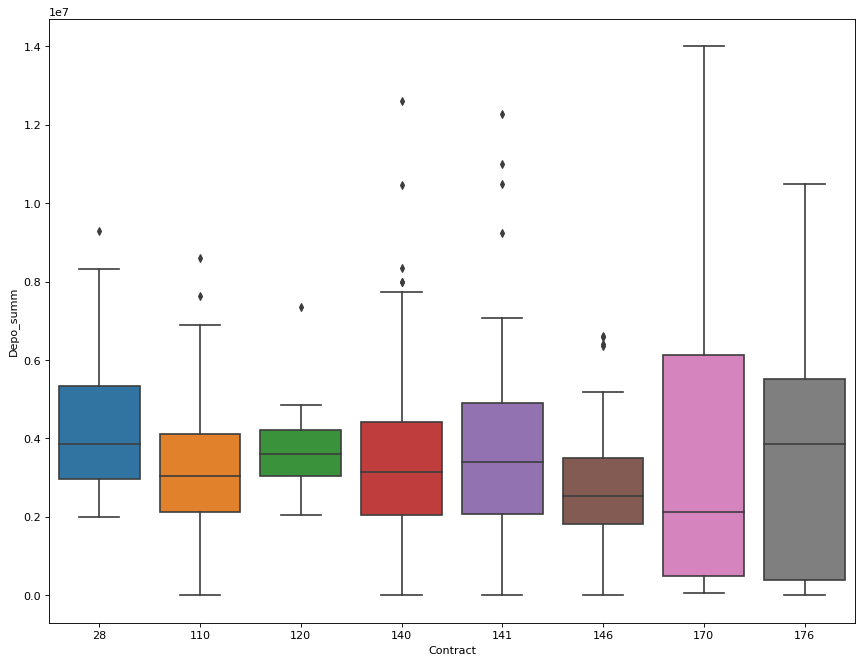

In [16]:
# Построим график без этого выброса.
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='Contract', y='Depo_summ', data=df[df['Depo_summ'] < df['Depo_summ'].max()], notch=False)

Компания работает в разных городах России. Проекты тоже разные и продаются с разной динамикой и успехом.
Выводы по графику:
Наиболее стабильный размер счета эскроу в договоре 120 и наиболее нестабильные в 170 и 176. С точки зрения бизнеса, стоит присмотреться к проектам, где продажи нестабильны.

([<matplotlib.axis.XTick at 0x7ff373f02208>,
 <a list of 8 Text xticklabel objects>)

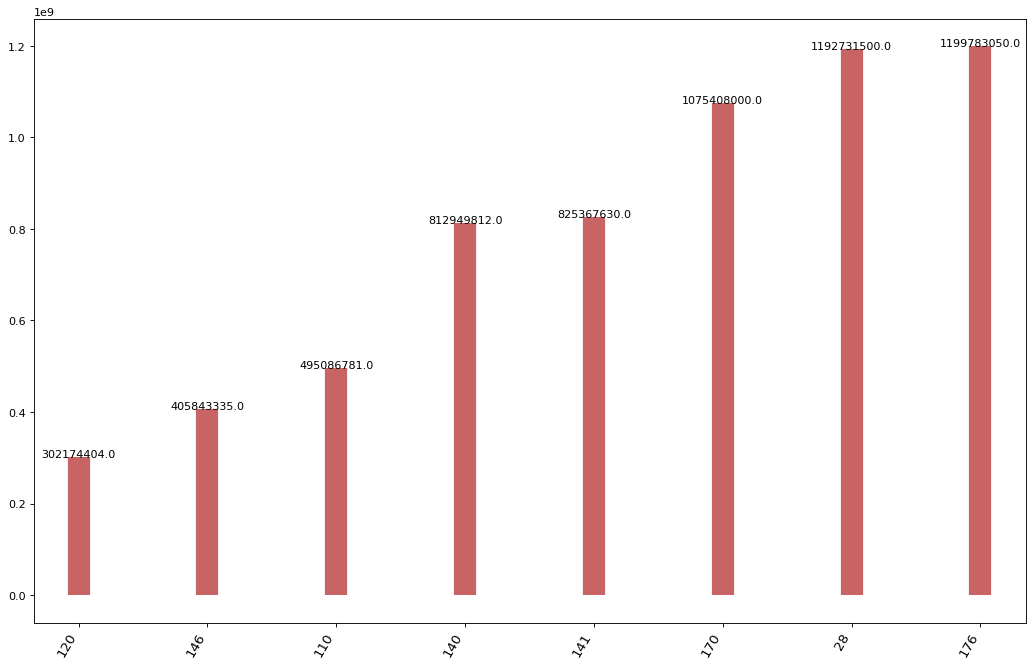

In [17]:
# Посмотрим на суммы продаж по договорам.
df1 = df.groupby('Contract').aggregate(sum)
df1.sort_values('Depo_summ', inplace=True)
df1.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df1.index, ymin=0, ymax=df1.Depo_summ, color='firebrick', alpha=0.7, linewidth=20)
for i, Depo_summ in enumerate(df1.Depo_summ):
    ax.text(i, Depo_summ+1, round(Depo_summ, 1), horizontalalignment='center')
plt.xticks(df1.index, df1.Contract, rotation=60, horizontalalignment='right', fontsize=12)

([<matplotlib.axis.XTick at 0x7ff373e7c358>,
 <a list of 8 Text xticklabel objects>)

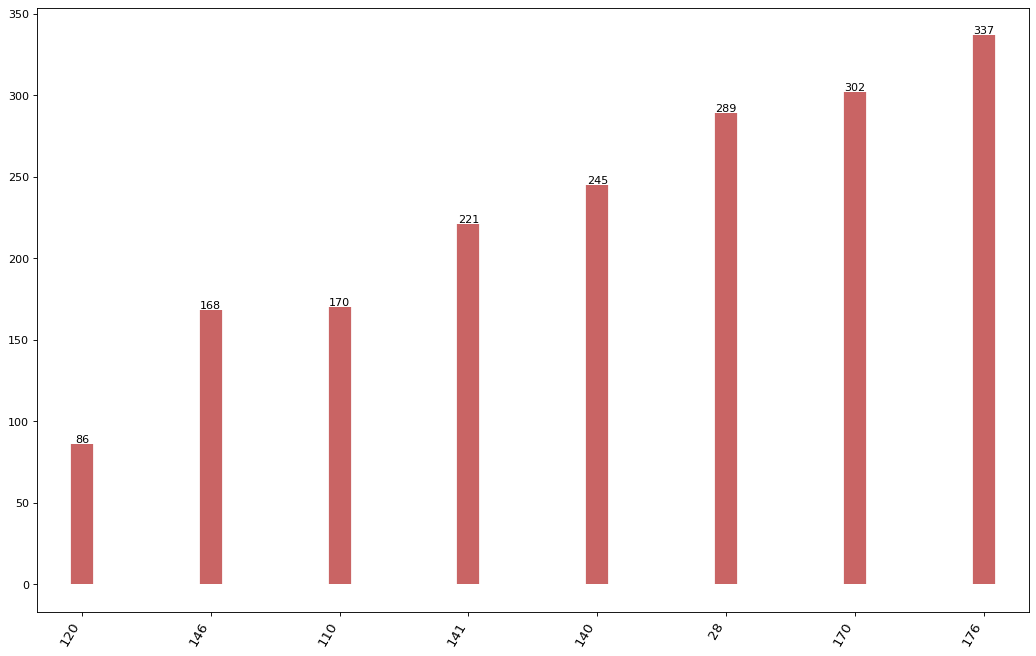

In [18]:
# А теперь на количество продаж по договорам.
df1 = df.groupby('Contract')['Depo_summ'].agg(['sum', 'count'])
df1.sort_values('count', inplace=True)
df1.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df1.index, ymin=0, ymax=df1['count'], color='firebrick', alpha=0.7, linewidth=20)
for i, count in enumerate(df1['count']):
    ax.text(i, count+1, round(count, 1), horizontalalignment='center')
plt.xticks(df1.index, df1.Contract, rotation=60, horizontalalignment='right', fontsize=12)

Выводы:
Видим, что некоторые договоры не совпадают в последовательности между суммой на эскроу и количеством продаж.
Например, договор 28 и 141 при меньших продажах демонстрируют большие суммы на счетах.

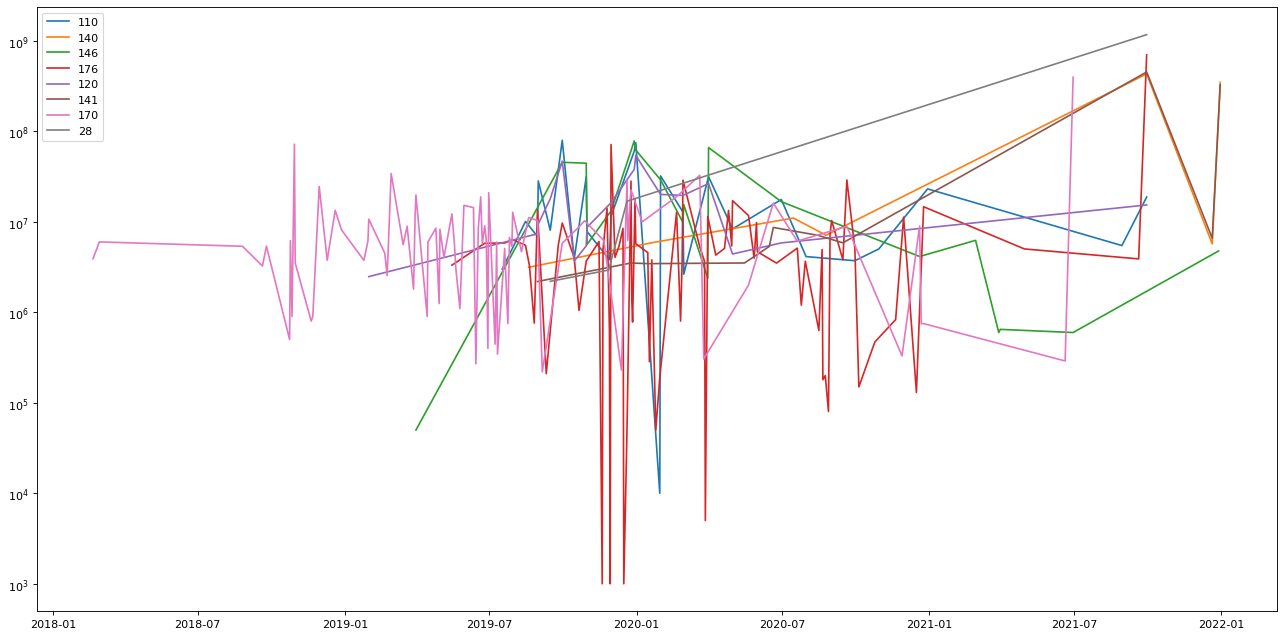

In [141]:
# Построим график продаж по договорам во времени. Дата внесения средств.
df1 = df.groupby(['Date_pay', 'Contract'])['Depo_summ'].agg(['sum'])
df1.sort_values('Date_pay', inplace=True)
df1.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(20,10), facecolor='white', dpi= 80)
ax.plot(df1[['Date_pay']][df1.Contract == 110], df1[['sum']][df1.Contract == 110], label='110')
ax.plot(df1[['Date_pay']][df1.Contract == 140], df1[['sum']][df1.Contract == 140], label='140')
ax.plot(df1[['Date_pay']][df1.Contract == 146], df1[['sum']][df1.Contract == 146], label='146')
ax.plot(df1[['Date_pay']][df1.Contract == 176], df1[['sum']][df1.Contract == 176], label='176')
ax.plot(df1[['Date_pay']][df1.Contract == 120], df1[['sum']][df1.Contract == 120], label='120')
ax.plot(df1[['Date_pay']][df1.Contract == 141], df1[['sum']][df1.Contract == 141], label='141')
ax.plot(df1[['Date_pay']][df1.Contract == 170], df1[['sum']][df1.Contract == 170], label='170')
ax.plot(df1[['Date_pay']][df1.Contract == 28], df1[['sum']][df1.Contract == 28], label='28')
plt.yscale('symlog')
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_la

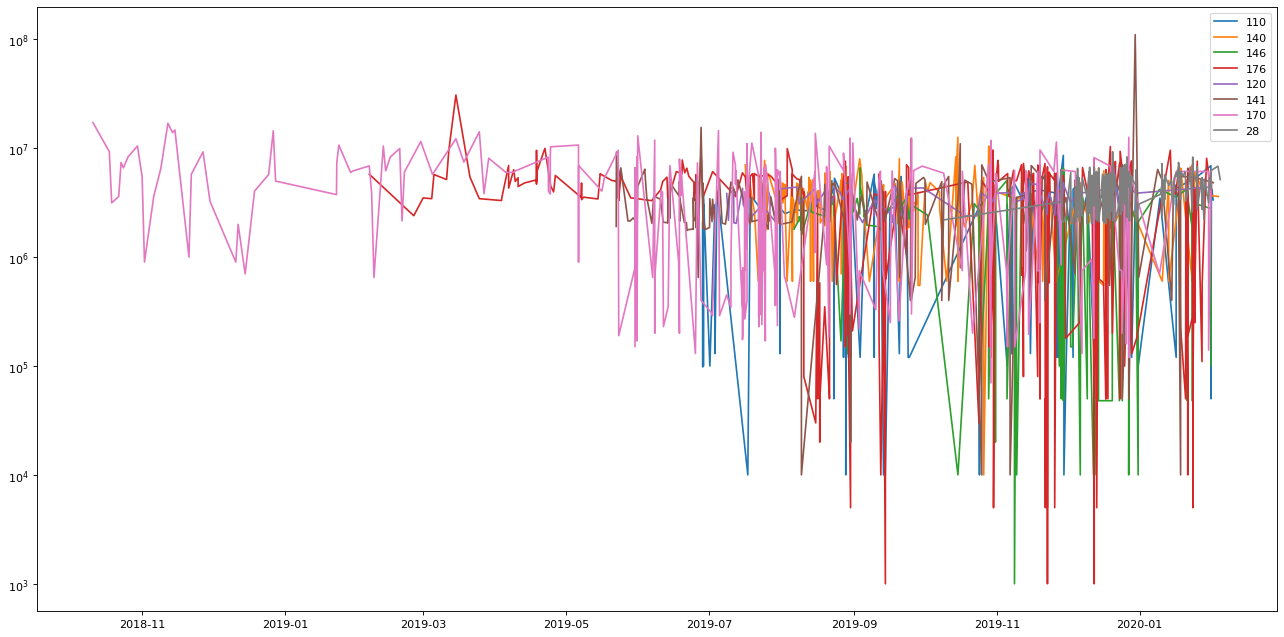

In [148]:
# Построим график продаж по договорам во времени. Дата открытия счета эскроу.
# Имеются выбросы sum = 1, они мешают поэтому ввожу доп. условие.
df1 = df.groupby(['Date_open_escrow', 'Contract'])['Depo_summ'].agg(['sum'])
df1.sort_values('Date_open_escrow', inplace=True)
df1.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(20,10), facecolor='white', dpi= 80)
ax.plot(df1[['Date_open_escrow']][df1.Contract == 110][df1['sum'] > 1], df1[['sum']][df1.Contract == 110][df1['sum'] > 1], label='110')
ax.plot(df1[['Date_open_escrow']][df1.Contract == 140][df1['sum'] > 1], df1[['sum']][df1.Contract == 140][df1['sum'] > 1], label='140')
ax.plot(df1[['Date_open_escrow']][df1.Contract == 146][df1['sum'] > 1], df1[['sum']][df1.Contract == 146][df1['sum'] > 1], label='146')
ax.plot(df1[['Date_open_escrow']][df1.Contract == 176][df1['sum'] > 1], df1[['sum']][df1.Contract == 176][df1['sum'] > 1], label='176')
ax.plot(df1[['Date_open_escrow']][df1.Contract == 120][df1['sum'] > 1], df1[['sum']][df1.Contract == 120][df1['sum'] > 1], label='120')
ax.plot(df1[['Date_open_escrow']][df1.Contract == 141][df1['sum'] > 1], df1[['sum']][df1.Contract == 141][df1['sum'] > 1], label='141')
ax.plot(df1[['Date_open_escrow']][df1.Contract == 170][df1['sum'] > 1], df1[['sum']][df1.Contract == 170][df1['sum'] > 1], label='170')
ax.plot(df1[['Date_open_escrow']][df1.Contract == 28][df1['sum'] > 1], df1[['sum']][df1.Contract == 28][df1['sum'] > 1], label='28')
plt.yscale('symlog')
plt.legend()

В разрезе времени видим, что продажи начались раньше всего по 170 договору. Также можем увидеть, что пик продаж пришелся на 4 квартал 2019 года, когда начались продажи и по другим договорам.
Согласно 1 графику, видим, что наибольшие поступления на счета эскроу ожидаются в 2022 году.


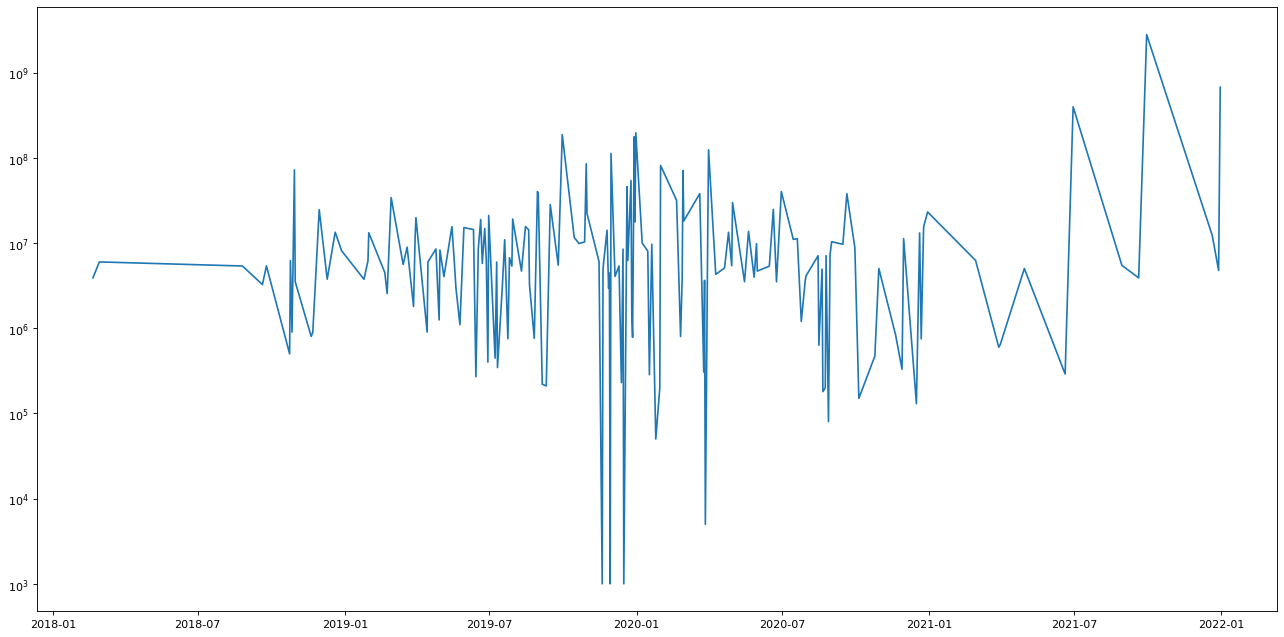

In [153]:
# Теперь график по всем продажам.
df1 = df.groupby(['Date_pay'])['Depo_summ'].agg(['sum'])
df1.sort_values('Date_pay', inplace=True)
df1.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(20,10), facecolor='white', dpi= 80)
ax.plot(df1['Date_pay'], df1['sum'])
plt.yscale('symlog')

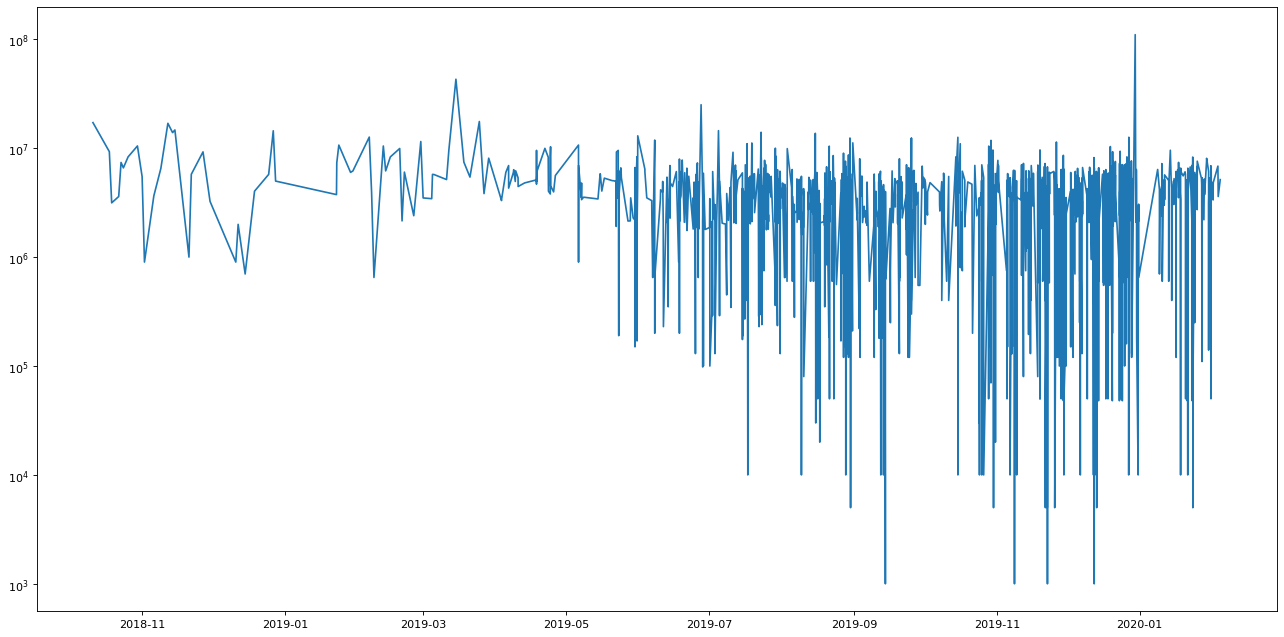

In [157]:
# Теперь график по всем продажам.
df1 = df.groupby(['Date_open_escrow'])['Depo_summ'].agg(['sum'])
df1.sort_values('Date_open_escrow', inplace=True)
df1.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(20,10), facecolor='white', dpi= 80)
ax.plot(df1['Date_open_escrow'][df1['sum'] > 1], df1[['sum']][df1['sum'] > 1])
plt.yscale('symlog')

Так видно нагляднее и тезисы по анализу в разрезе договоров подтверждаются.